In [167]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm

In [168]:
df = pd.read_csv(r'/Users/brodyuehara/Desktop/Monte Carlo Simulation/Bitcoin Historical Price (11:2:19).csv')
df.describe()

,Open,High,Low,Close,Market Cap
count,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,2950.322769,3033.404500,2860.844870,2954.092113,5.010377e+10
std,3744.670585,3869.083966,3599.714242,3746.472313,6.511827e+10
min,68.500000,74.560000,65.530000,68.430000,7.784112e+08
25%,373.295000,380.740000,363.605000,373.430000,5.099696e+09
50%,677.410000,699.605000,656.680000,677.815000,1.020377e+10
75%,5306.242500,5392.222500,5233.415000,5317.035000,9.331259e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,3.265025e+11


In [169]:
print(df.Close[1])

9261.1


In [170]:
df.describe()

,Open,High,Low,Close,Market Cap
count,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,2950.322769,3033.404500,2860.844870,2954.092113,5.010377e+10
std,3744.670585,3869.083966,3599.714242,3746.472313,6.511827e+10
min,68.500000,74.560000,65.530000,68.430000,7.784112e+08
25%,373.295000,380.740000,363.605000,373.430000,5.099696e+09
50%,677.410000,699.605000,656.680000,677.815000,1.020377e+10
75%,5306.242500,5392.222500,5233.415000,5317.035000,9.331259e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,3.265025e+11


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 7 columns):
Date          2380 non-null object
Open          2380 non-null float64
High          2380 non-null float64
Low           2380 non-null float64
Close         2380 non-null float64
Volume        2380 non-null object
Market Cap    2380 non-null float64
dtypes: float64(5), object(2)
memory usage: 130.3+ KB


In [172]:
print(float('9324.72')) 

9324.72


In [173]:
df.Close = df.Close.astype(float)
df_close = pd.DataFrame()
df_close = df['Close']
print(df_close)

0       9324.72
1       9261.10
2       9199.58
3       9205.73
4       9427.69
         ...   
2375     105.21
2376     116.99
2377     139.00
2378     144.54
2379     134.21
Name: Close, Length: 2380, dtype: float64


In [174]:
returns = np.log(df.Close) - np.log(df.Close.shift(1))
volatility = returns.std()
meanReturn = np.mean(returns)

In [175]:
numSimulations = 10000
predictedDays = 365
lastPrice = df_close[0]

In [176]:
print(lastPrice)

9324.72


In [177]:
results = pd.DataFrame()
sim = 0

while (sim < numSimulations):
    
    prices = []
    days = 0
    prices.append(lastPrice)
    timeStep = 1
    
    while (days < predictedDays):
        
        drift = (meanReturn - volatility**2/2)*timeStep
        shock = volatility * np.random.normal()*timeStep**0.5
        
        Price = prices[days] * np.exp(drift+shock)
        prices.append(Price)
        days = days + 1
        
    results[str(sim)] = pd.Series(prices).values #Add column to pandas data frame
    sim = sim + 1 #increment simulation counter

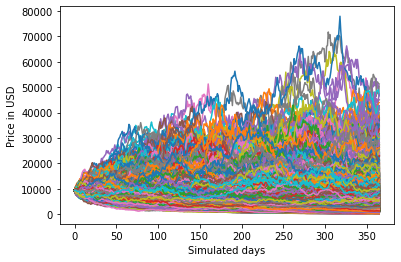

In [178]:
fig = plt.figure()
plt.plot(results)
plt.ylabel('Price in USD')
plt.xlabel('Simulated days')
plt.show()

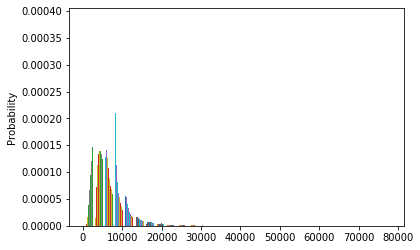

In [179]:
plt.hist(results, density=True, bins=30)
plt.ylabel('Probability')
plt.show()

In [180]:
print(results)

                0            1             2            3            4  \
0     9324.720000  9324.720000   9324.720000  9324.720000  9324.720000   
1     9941.581254  9120.986194   8705.174228  9077.400459  8923.983771   
2    10077.232885  8995.999417   8537.643393  8511.505524  8609.550129   
3     9986.233771  8812.044992   8549.622675  8397.962782  8807.918628   
4     9616.170777  9309.240008   8496.811772  8195.200484  8469.679646   
..            ...          ...           ...          ...          ...   
361   2235.603130  2040.787326  20328.934690  5154.220211  1863.773789   
362   2242.340558  1913.303554  20057.484591  4980.536384  1880.196053   
363   2387.633959  1774.326741  20392.889222  4866.364371  1850.578048   
364   2530.362890  1786.984861  21158.290729  4664.391738  1746.914220   
365   2647.126395  1804.706704  19696.171052  4639.832162  1654.982656   

               5            6            7             8             9  ...  \
0    9324.720000  9324.720000  9

In [181]:
lastDay = results.loc[365]
print(lastDay)

0        2647.126395
1        1804.706704
2       19696.171052
3        4639.832162
4        1654.982656
            ...     
9995     3138.027954
9996     5235.366128
9997     2666.646256
9998     5599.773765
9999    11531.431487
Name: 365, Length: 10000, dtype: float64


In [182]:
average1YearPrice = sum(lastDay)/len(lastDay)
print(average1YearPrice)

4883.774529074819


In [183]:
print(lastPrice)

9324.72


In [184]:
percentageChange = ((average1YearPrice - lastPrice)/lastPrice)*100
print(percentageChange)

-47.62551015928822
